In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import stats
from scipy import constants
import scipy.optimize as opt

trails1 =np.loadtxt("norm/1017_RXC_super1.txt",)[::,100::]
trails2 =np.loadtxt("norm/1017_RXC_super2.txt",)[::,70::]
trails3 =np.loadtxt("norm/1017_RXC_super3.txt",)[::,100::]
tempconversion=pd.read_csv("Ttype.csv").to_numpy().T
tempslpine= inter.InterpolatedUnivariateSpline(-tempconversion[1]*10**-3,tempconversion[0])

def linemodel(x,m,b):
    return(m*x+b)

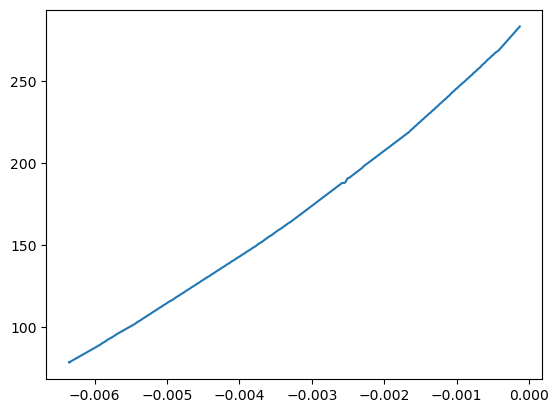

In [2]:
plt.plot(trails2[1],tempslpine(trails2[1]))

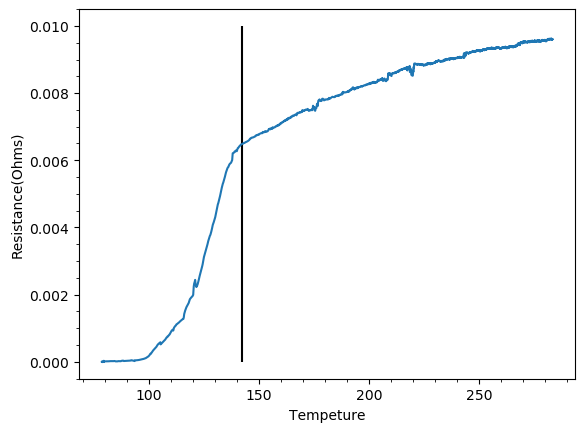

In [3]:
plt.plot(tempslpine(trails2[1]),trails2[0]/0.3)
plt.ylabel("Resistance(Ohms)")
plt.vlines(tempslpine(trails2[1,440]),0,0.01)
plt.xlabel("Tempeture")
plt.minorticks_on()

In [14]:
trails2[0,340:420:]/0.3


array([0.00243857, 0.00228383, 0.00222669, 0.00226252, 0.00231363,
       0.00236858, 0.00242825, 0.00249107, 0.00255738, 0.00262584,
       0.00269684, 0.00276436, 0.0028447 , 0.00290672, 0.00298001,
       0.00304376, 0.00311864, 0.00317586, 0.00324561, 0.00329809,
       0.00335353, 0.00340255, 0.00345414, 0.00349758, 0.00355108,
       0.00359608, 0.00364407, 0.00368654, 0.00374903, 0.00377973,
       0.00382751, 0.00387566, 0.00391869, 0.00396774, 0.00401872,
       0.00407473, 0.00411074, 0.00415694, 0.00420539, 0.00425788,
       0.00430515, 0.00436129, 0.00440764, 0.00445894, 0.00451368,
       0.00456675, 0.00462157, 0.00468528, 0.00472688, 0.00478157,
       0.00484114, 0.00488354, 0.00493819, 0.00498924, 0.00503787,
       0.00509299, 0.00515058, 0.00518702, 0.00524037, 0.00529791,
       0.00533817, 0.00538473, 0.00542947, 0.00547392, 0.00550804,
       0.00554872, 0.00559445, 0.00563754, 0.00567619, 0.00572352,
       0.00576005, 0.00578686, 0.00579912, 0.00583105, 0.00585

In [29]:
re=stats.linregress(tempslpine(trails2[1]),trails2[0]/0.3)

In [30]:
#p,C=stats.linregress(linemodel,tempslpine(trails1[1,210:290:]),trails1[0,210:290:]/0.3,p0=(1,0),absolute_sigma=True)
re

LinregressResult(slope=4.5461912434071025e-05, intercept=-0.0020755201074610513, rvalue=0.9268554562872007, pvalue=0.0, stderr=3.403029313546881e-07, intercept_stderr=7.643826724482392e-05)

In [31]:
p,C=opt.curve_fit(linemodel,tempslpine(trails1[1,210:290:]),(trails1[0,210:290:]/0.3),p0=(1,0),absolute_sigma=True)
p

array([ 0.00021465, -0.02290671])

Text(0.5, 0, 'Tempeture')

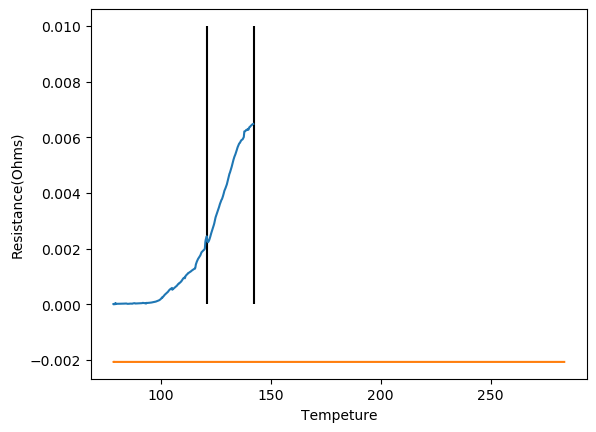

In [33]:
plt.plot(tempslpine(trails2[1,70:440]),trails2[0,70:440]/0.3)
plt.ylabel("Resistance(Ohms)")

plt.plot(tempslpine(trails2[1]),linemodel(trails2[1],re[0],re[1]))
plt.vlines(tempslpine(trails2[1,340]),0,0.01)
plt.vlines(tempslpine(trails2[1,440]),0,0.01)
plt.xlabel("Tempeture")

Text(0.5, 0, 'Tempeture')

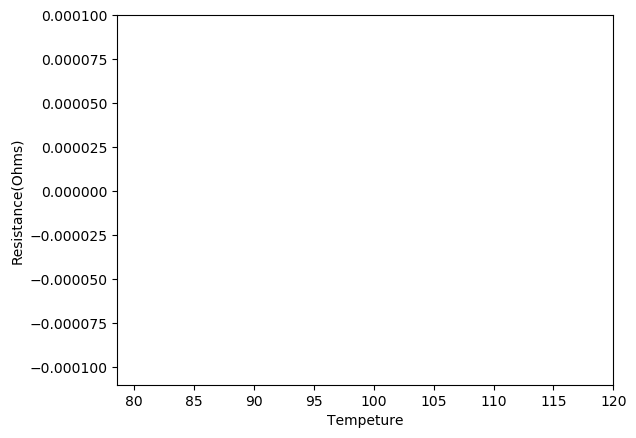

In [9]:
#plt.plot(tempslpine(trails1[1]),trails1[0]/0.3,".")
plt.plot(tempslpine(trails1[1]),linemodel(trails1[0]/0.3,p[0],p[1]))
plt.xlim(78.6,120)
plt.ylim(-0.00011,0.0001)
plt.ylabel("Resistance(Ohms)")
plt.xlabel("Tempeture")

In [10]:
data=(trails1[0]/.3)[np.where(tempslpine(trails1[1])<80.2)]
np.mean(data), np.std(data)

(-1.7146418491909378e-07, 2.4667645089157513e-06)

Text(0.5, 0, 'Tempeture')

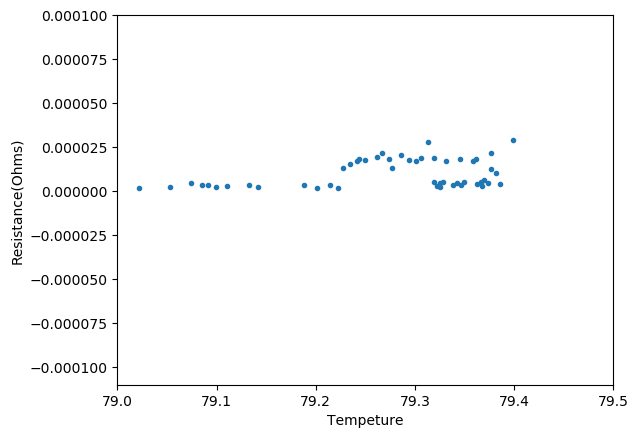

In [11]:
plt.plot(tempslpine(trails2[1]),trails2[0]/0.3,".")
plt.xlim(79,79.5)
plt.ylim(-0.00011,0.0001)
plt.ylabel("Resistance(Ohms)")
plt.xlabel("Tempeture")

In [12]:
data=(trails2[0]/.3)[np.where(tempslpine(trails2[1])<79.5)]
np.mean(data), np.std(data)

(2.835772916987952e-06, 6.640825384260627e-06)

In [13]:
data=(trails3[0]/.3)[np.where(tempslpine(trails3[1])<80.2)]
np.mean(data), np.std(data)

(5.928516804123711e-06, 2.407011459104853e-06)